<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Business Statistics</center></font></h1>
<h1><center>Mentored Learning Session: Week 3</center></h1>




<center><img src="https://cdn.pixabay.com/photo/2015/09/21/00/54/plant-949111_960_720.jpg" width="1000" height="600"></center>

<b><h2><center>AZ Tunes Case Study</center></h2></b>

## Problem Statement






### Business Context

AZ Tunes is a music streaming company and they analyze customer data to improve recommendations, playlists, and rollout special offers. Their persistent work to uncover and act upon evolving customer expectation has resulted in higher customer engagement time and subscription to their paid service. 

### Objective

The Marketing team of AZ Tunes wants to rollout special offers through a new campaign. As a data scientist, your objective is to help the team design the campaign by providing the below data-driven inputs:

* According to a study, the average weekly app engagement time of users in leading music services is around 6 hrs. Can we claim that the app engagement time of AZ tunes is better than this market standard?
* The team wants to spend their budget on the age group which has the highest chance of subscribing as part of their campaign 

You need to perform statistical analysis on a sample of customer data and provide an evidence-based conclusion to help the marketing campaign succeed. 

### Data Dictionary

For this task, you are provided with a random sample of 1000 users along with their age group & engagement time on the AZ tunes app.
* user_id: Unique user-id of the user
* age_group: Age-group that the user belongs to
* subscription_status: Whether the user is a subscribed user or a non-subscribed user
* enagement_time: Weekly average of app engagement time (in hrs) of the user


### Solution Approach

To solve the above problem, we need to answer 2 questions:
* Is the average app engagement time of AZ Tunes significantly greater than the market average (6 hours)?
* Is the difference in proportions of subscribers & non-subscribers (in 3 groups - under 18, 18-34, and over 35) significantly different to conclude that a particular group is most likely to subscribe?


## Import necessary packages and the data

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

In [ ]:
# import the scipy package and check the version to be sure that the version is above 1.6.1 so that some updated functions do not throw error.
import scipy
scipy.__version__

'1.7.3'

In [ ]:
# if the scipy version is lower than 1.6.1, then uncomment the below code to update the scipy package.
#!pip install --upgrade scipy

## Loading the dataset

In [ ]:
# read the dataset
df=pd.read_csv('az_tunes.csv')

## Data Overview

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### Displaying the first few rows of the dataset

In [ ]:
# view the dataset
df.head()

,user_id,age_group,subscription_status,engagement_time
0,14451,18-34,subscribed,5.55
1,18386,under 18,subscribed,5.12
2,12305,35 and over,not_subscribed,4.25
3,17546,18-34,subscribed,8.54
4,15399,18-34,subscribed,12.12


#### Checking the shape of the dataset

In [ ]:
df.shape

(1000, 4)

The dataset contains 1000 rows and 4 columns.

#### Checking the data types of the columns for the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              1000 non-null   int64  
 1   age_group            1000 non-null   object 
 2   subscription_status  1000 non-null   object 
 3   engagement_time      1000 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


There are 2 categorical columns and two numeric columns in the dataset.

#### Check for missing values

In [ ]:
df.isna().sum()   

user_id                0
age_group              0
subscription_status    0
engagement_time        0
dtype: int64

There are no missing values in the data.

#### Statistical summary of the dataset

In [ ]:
df.describe()

,user_id,engagement_time
count,1000.000000,1000.000000
mean,15024.803000,6.180030
std,2927.044957,2.757166
min,10000.000000,0.220000
25%,12452.500000,3.917500
50%,15184.000000,6.000000
75%,17481.250000,8.110000
max,19976.000000,16.980000


* The user_id is a column consisting of unique user-ids.
* The mean engagement-time is 6.18 hrs, while the median engagement-time is 6 hrs.

## One Sample t-test

**Is the average app engagement time of AZ Tunes significantly greater than the market average (6 hours)?**

To visualize the distribution of engagement-time, we can plot a distribution plot.

Sample mean: 6.18


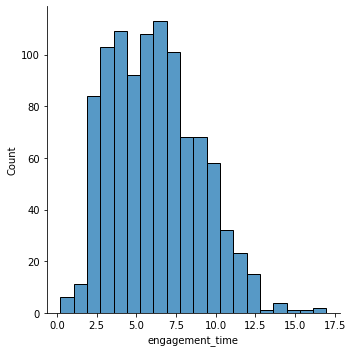

In [ ]:
# plot the distribution plot of engagement-time
print('Sample mean:', np.round(df.engagement_time.mean(),2))
sns.displot(df.engagement_time)
plt.show()

* The distribution looks a little skewed to the right. 

### Step 1: Define null and alternative hypotheses

Let's frame the null and alternative hypothesis based on the above claim can be formulated as:

> $H_0:$ The mean app engagement time of AZ Tunes is less than or equal to 6 hrs. <br>

> $H_a:$ The mean app engagement time of AZ Tunes is greater than 6 hrs.

Let $\mu$ be the mean app engagement time of AZ Tunes

Mathematically, the above formulated hypotheses can be written as:

>$H_0: \mu \le 6 $ <br>
$H_a: \mu > 6 $

### Step 2: Select Appropriate test

This is a case of a one-tailed test for the significance of a single mean. As the population standard deviation is unknown, a one-sample t-test will be appropriate to test the formulated hypotheses.

In a **one sample t-test**, we compare a sample mean with a hypothesized population mean to check if the sample mean differs significantly from the population mean. 

We are provided that the sample is randomly selected and we assume that it has come from a normally distributed population.

### Step 3: Decide the significance level

Let's set the level of significane (alpha) as 0.05

### Step 4: Calculate the p-value

- We will use the `ttest_1samp()` function from the `scipy.stats` library to perform a one-sample t-test.
- The `ttest_1samp()` function takes the sample observations, hypothesized population mean and the direction of the alternative hypothesis as input and returns the test statistic and the p-value for the test. 
    - The sample observations are the values of app engagement time in the dataset.
    - The hypotheisized population mean, as provided in the problem statement and defined in the formulated hypotheses is 6 hours
    - As it is a one-tailed test towards the right, we will set the argument `alternative = 'greater'`

In [ ]:
hyp_mean = 6
t_stat, p_value = stats.ttest_1samp(df['engagement_time'], hyp_mean, alternative='greater') # alternative argument is used to specify the tail of the test.

print("Test Statistic =",t_stat)
print("p-value =",p_value)

Test Statistic = 2.064818723238125
p-value = 0.019598877431817582


* Note: The type of test (one-tailed/two-tailed) has an effect on the p-value. The alternative argument is set to '**greater**' as our alternative hypothesis states that mean app engagement time of AZ Tunes is **greater** than the market average. 

**The test statistic follows a t distribution.**

Let's plot the distribution of the t-test statistic and see where the computed test statistic lies in the plot.

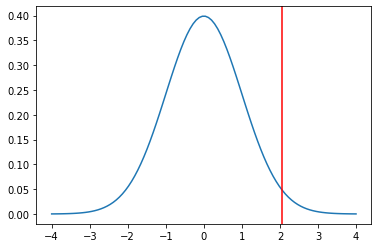

In [ ]:
# plot the t-stat distribution
# import the required function
from scipy.stats import t

# plotting the distribution of t test statistic along with the computed test statistic
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, t.pdf(x,df=len(df)-1)) # plot the pdf of the t distribution with n-1 degrees of freedom
plt.axvline(x = t_stat, c = 'r') # draw a vertical red line through the mentioned point
plt.show() # display the plot

### Step 5: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.019598877431817582 is less than the level of significance, we reject the null hypothesis.


### Step 6: Draw Inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean app engagement time of AZ tunes is greater than the market average (6 hrs).

## Chi-square Test for Independence

**Is the difference in proportions of subscribers & non-subscribers (in 3 groups - under 18, 18-34, and over 35) significantly different to conclude that a particular group is most likely to subscribe?**

Since both the concerned variables are categorical in nature, we can use a contingency table and a stacked bar graph to visually inspect the data.

- A contingency table is a tabular representation of categorical data that shows the number of observations for combinations of values between two categorical variables, say X and Y
- Each cell in the contingency table represents a combination of X-Y values

The pandas [crosstab()](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) function is used to create a contingency table between two categorical variables from a dataframe. The syntax of the function is:

`pd.crosstab(index, columns, margins=False, normalize=False)`

where
- *index*: Values to group by in the rows
- *columns*: Values to group by in the columns
- *margins*: Whether to add row/column sub-totals. Default value is False
- *normalize*: Whether to normalize the value-counts. Default value is False



In [ ]:
# create a contingency table to tabulate the frequencies of the two categorical variables
pd.crosstab(df.age_group,df.subscription_status,margins=True)

subscription_status,not_subscribed,subscribed,All
age_group,,,
18-34,103,262,365
35 and over,237,171,408
under 18,107,120,227
All,447,553,1000


* There are a total of 1000 people in the sample
* In the 18-34 age group, 262 out of 365 (or 71.78%) users are subscribed users.
* In the 35 and over age group, 171 out of 408 (41.91%) users are subscribed users.
* In the under 18 age group, 120 out of 227 (52.86%) users are subscribed users.

To visualize the relationship between the two categorical variables, we can plot a stacked bar chart.

- A stacked bar chart, also known as a stacked bar graph, is a graph that is used to break down and compare parts of a whole
- Each bar in the chart represents a whole, and segments in the bar represent different parts or categories of that whole
- Different colors are used to illustrate the different categories in the bar

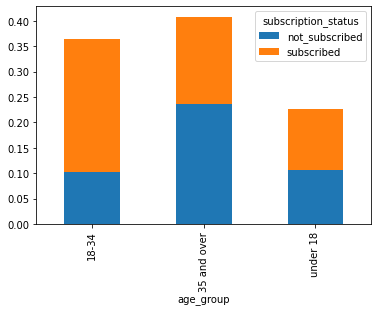

In [ ]:
# visual analysis
pd.crosstab(df.age_group,df.subscription_status,normalize=True).plot(kind='bar',stacked=True)

* The proportion of subscribed users is higher in the age group 18-34 than the other two age groups. 
* Based on the sample data, we can infer that the proportion of subscribers is higher for one age group, but is this difference significant enough to conclude that subscription status is dependent on the age group?

### Step 1: Define null and alternative hypotheses

**Let's formulate the null and alternative hypothesis for the above problem**

$H_0:$ Customer age group and subscription status are independent of each other

$H_a:$ Customer age group and subscription status are dependent on each other

### Step 2: Select Appropriate test

To test the dependence between two categorical variables, a Chi-square test for independence is used.

A **chi-square test for independence** is a test based on the chi-square probability distribution. It involves the calculation of a chi-square test statistic. A chi-square (χ2) statistic is a measure of the difference between the observed and expected frequencies of the outcomes of a set of events or variables, given the size of the sample and the number of variables in the relationship. The idea behind the chi-square test is to compare what we observe in the random sample to what we expect to observe when we assume that there is no relationship between the two variables.

### Step 3: Decide the significance level

Let's set the level of significane (alpha) as 0.05

### Step 4: Collect and prepare data

Let's prepare the data for the test. To perform the chi-squared test of independance, we need to create the contingency table, for which we will use `pd.crosstab()`

In [ ]:
# prepare a contingency table to perform the test
contingency_table = pd.crosstab(df.age_group, df.subscription_status)
contingency_table

subscription_status,not_subscribed,subscribed
age_group,,
18-34,103,262
35 and over,237,171
under 18,107,120


### Step 5: Calculate the p-value

We will use the `chi2_contingency` function from the scipy stats library to perform the hypothesis test. It takes the contingency table as an input and returns the test statistic, p-value, degrees of freedom, and the expected frequencies as the output.

In [ ]:
# import the required test function
from scipy.stats import chi2_contingency

# calculate the test results
chi, p_value, dof, expected = chi2_contingency(contingency_table)

print("Test Statistic =",chi)
print("p-value =",p_value)
print("Degrees of freedom =",dof)
print("Expected frequencies \n", expected)

Test Statistic = 70.23716243606756
p-value = 5.600076564450542e-16
Degrees of freedom = 2
Expected frequencies 
 [[163.155 201.845]
 [182.376 225.624]
 [101.469 125.531]]


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 5.600076564450542e-16 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that age group and subscription_status are dependent on each other.

## Actionable Insights and Conclusions

- From the sample data, we observed that
  - 50% of the people spend at least 6 hours on an average per week on the AZ Tunes App
  - The average weekly app engagement time of AZ Tunes was 6.18 hours

- There is enough statistical evidence (p-value of 0.0196 at 5% level of significance) to conclude that the average app engagement time of AZ Tunes is greater than the market average

- The difference in proportions of subscribers across the 3 age groups is significant enough (p-value of 5.60 x 10^(-16) at 5% level of significance) to conclude that the age group 18-34 is most likely to subscribe
  - AZ Tunes can focus more on designing the special offers for this age group to be used in the marketing campaign

****